# Customer Segmentation Using K-Means Clustering

## Introduction
In this project, we aim to segment customers of a retail store based on their purchase history using K-Means clustering algorithm. Customer segmentation is a crucial task for businesses as it helps in understanding customer behavior, targeting marketing efforts, and improving overall customer satisfaction.

## Dataset
We will utilize a dataset containing information about customers' purchase history. This dataset includes features such as:
- Customer ID
- Gender
- Age
- Annual Income (in thousands of dollars)
- Spending Score (ranging from 1 to 100)

## Approach
1. **Data Preprocessing**: We'll start by cleaning and preprocessing the dataset. This involves handling missing values, scaling features if necessary, and any other necessary data transformations.
2. **Feature Engineering**: We may need to engineer new features or select relevant features that can improve clustering performance.
3. **K-Means Clustering**: We'll apply the K-Means clustering algorithm to segment customers into distinct groups based on their purchase behavior.
4. **Evaluation**: We'll evaluate the quality of the clusters using appropriate metrics such as silhouette score, inertia, or Davies-Bouldin index.
5. **Interpretation**: Once we have obtained the clusters, we'll interpret the results to understand the characteristics of each segment and how they differ from each other.

## Implementation
We'll implement the project using Python and popular libraries such as pandas, scikit-learn, and matplotlib/seaborn for data manipulation, clustering, and visualization.

## Results and Discussion
We'll present the results of the clustering analysis and discuss the insights gained from the segmentation. This includes understanding the characteristics of each customer segment and potential business strategies to target these segments effectively.

## Conclusion
In conclusion, customer segmentation using K-Means clustering provides valuable insights for businesses to understand their customer base better and tailor their marketing strategies accordingly.



## Import Library 

In [65]:
# Data Manipulation 
#==================================================================
import numpy as np 
import pandas as pd 

# Model
#==================================================================
from sklearn.cluster import KMeans

# Data Preprocessing 
#==================================================================
from sklearn.preprocessing import StandardScaler

#Data Visualization
#========================================================================================
import matplotlib.pyplot as plt 
import seaborn as sns 


#Metrics
#========================================================================================
from sklearn.metrics import silhouette_score, davies_bouldin_score

#Warnings
#========================================================================================
import warnings
warnings.filterwarnings('ignore')

## Read The Data

In [66]:
Mall_Customer=pd.read_csv('E:/My_Project/Prodigy InfoTech/Task 2/Dataset/Mall_Customers.csv')

In [67]:
Mall_Customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [68]:
Mall_Customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [69]:
Mall_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [70]:
Mall_Customer.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [71]:
Mall_Customer['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [72]:
Mall_Customer['CustomerID'].nunique()

200

In [73]:
Mall_Customer.groupby('CustomerID')['Gender'].first()

CustomerID
1        Male
2        Male
3      Female
4      Female
5      Female
        ...  
196    Female
197    Female
198      Male
199      Male
200      Male
Name: Gender, Length: 200, dtype: object

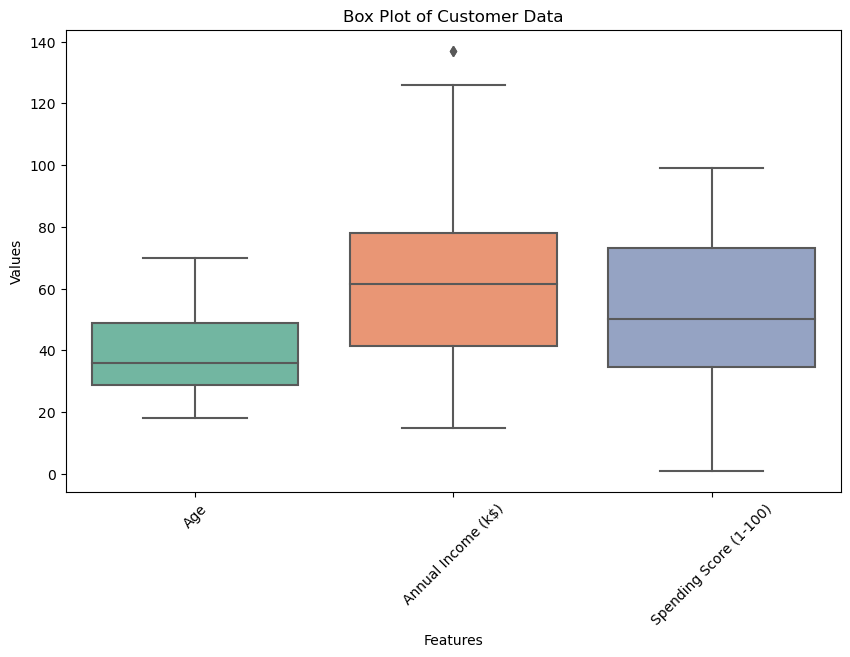

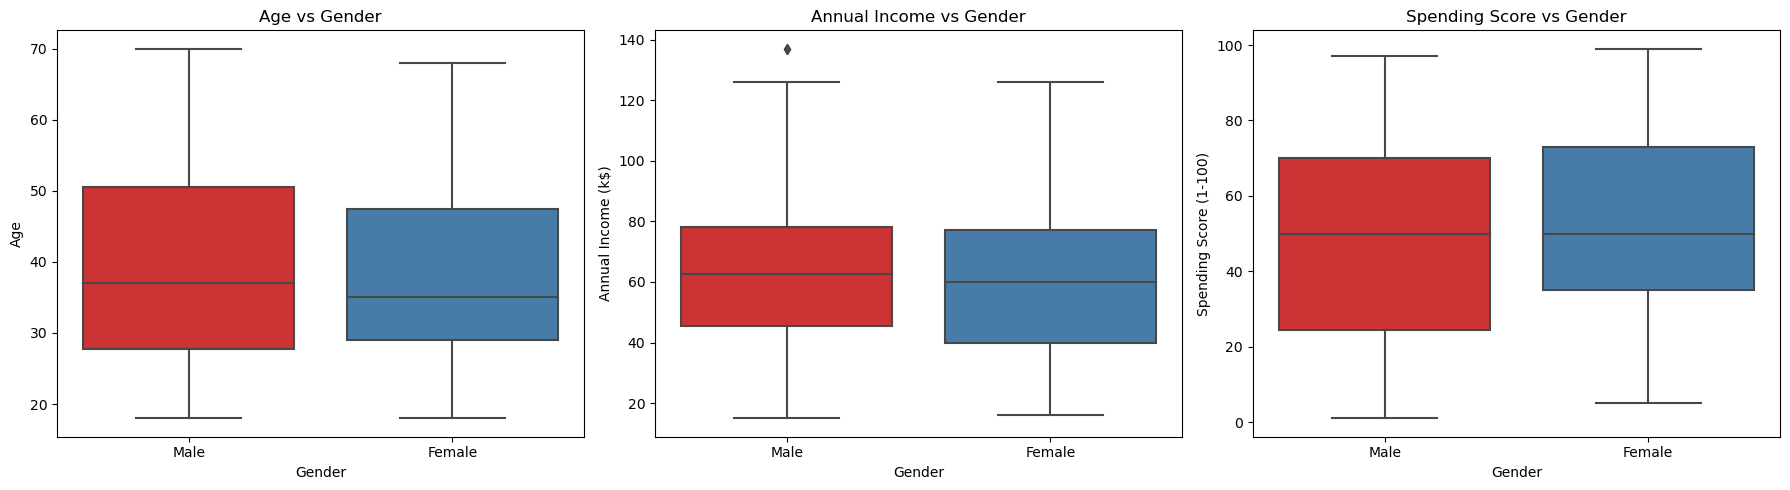

In [74]:
# Box plot for each numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(data=Mall_Customer[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], palette='Set2')
plt.title("Box Plot of Customer Data")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

# Scatter plot for each numerical column against 'Gender'
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Age', data=Mall_Customer, palette='Set1')
plt.title("Age vs Gender")
plt.xlabel("Gender")
plt.ylabel("Age")

plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=Mall_Customer, palette='Set1')
plt.title("Annual Income vs Gender")
plt.xlabel("Gender")
plt.ylabel("Annual Income (k$)")

plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=Mall_Customer, palette='Set1')
plt.title("Spending Score vs Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1-100)")

plt.tight_layout()
plt.show()


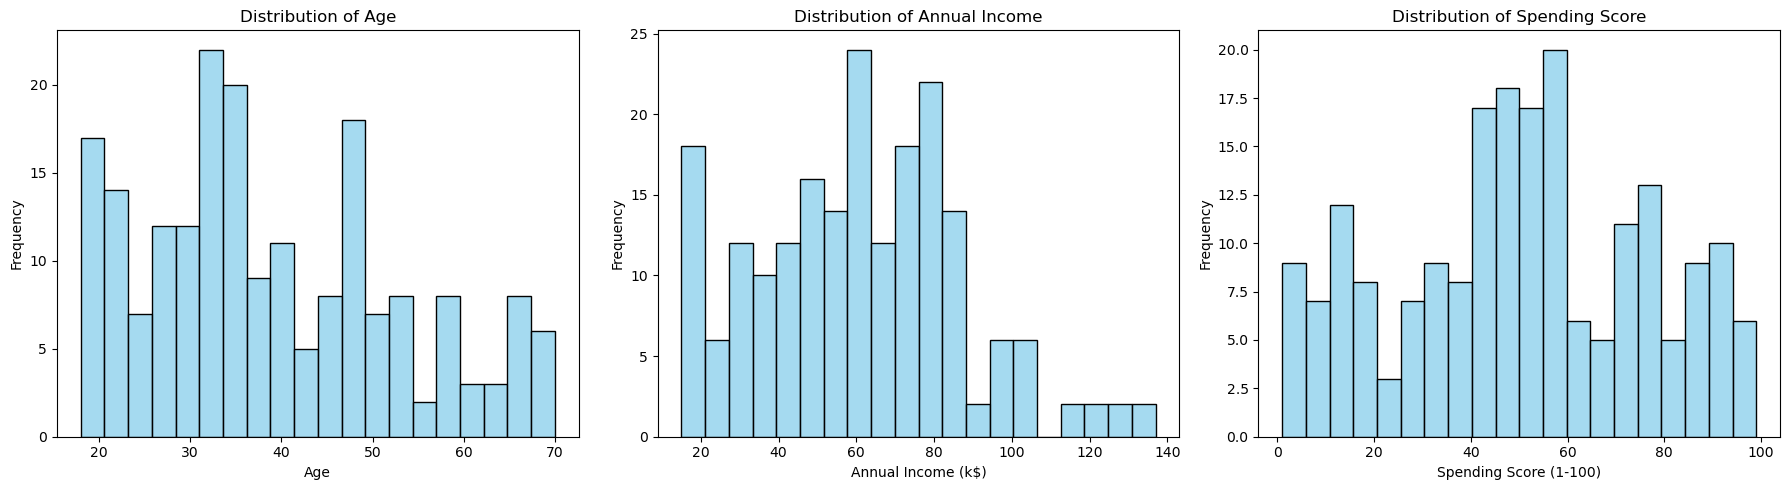

In [75]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=Mall_Customer, x='Age', bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
sns.histplot(data=Mall_Customer, x='Annual Income (k$)', bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
sns.histplot(data=Mall_Customer, x='Spending Score (1-100)', bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Spending Score")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Preprocessing The Data

In [76]:
X=Mall_Customer[['Annual Income (k$)','Spending Score (1-100)']]

In [77]:
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)


## Modeling 

In [78]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_Scaled)
    wcss.append(kmeans.inertia_)

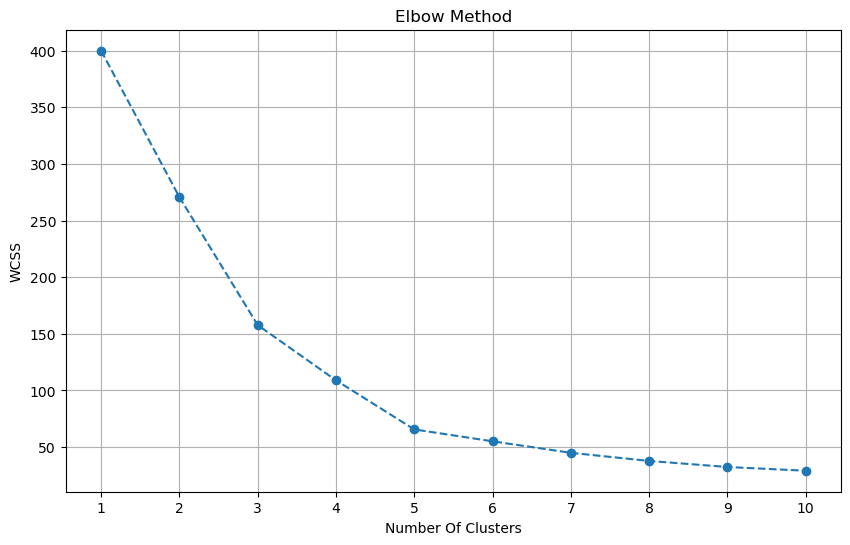

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()


## Number Of Clusters = 5 Based on Elbow Method 

In [80]:
n_cluster=5
Kmeans=KMeans(n_clusters=n_cluster , init='k-means++',max_iter=300,random_state=42)
Kmeans.fit(X_Scaled)

KMeans(n_clusters=5, random_state=42)

In [81]:
Mall_Customer['Cluster']=Kmeans.labels_

In [82]:
Mall_Customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


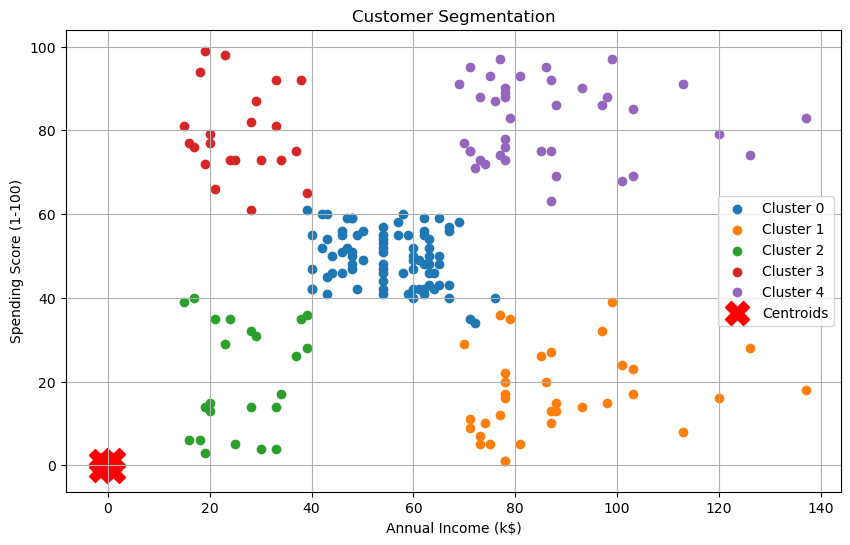

In [83]:
plt.figure(figsize=(10,6))
for cluster in range(n_cluster):
    cluster_data=Mall_Customer[Mall_Customer['Cluster']==cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

Cluster Centers:
[[ 63.72093023  46.1627907 ]
 [ 30.          34.61538462]
 [ 77.78571429  73.28571429]
 [ 80.18181818  12.68181818]
 [ 24.58333333   9.58333333]
 [ 25.0952381   80.04761905]
 [109.7         22.        ]
 [114.71428571  78.42857143]
 [ 48.1         52.675     ]
 [ 82.38888889  90.44444444]]


In [85]:
labels = kmeans.labels_

silhouette = silhouette_score(X_Scaled, labels)
print(f"Silhouette Score: {silhouette}")


inertia = np.sum(np.min(np.square(X_Scaled - kmeans.cluster_centers_[kmeans.labels_]), axis=1))
print(f"Inertia: {inertia}")


davies_bouldin = davies_bouldin_score(X_Scaled, labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.4476280825932578
Inertia: 5.374855826664817
Davies-Bouldin Index: 0.7509212753401624


## Interpreting Clustering Results

### Silhouette Score:
- The silhouette score ranges from -1 to 1.
- A score closer to 1 indicates dense, well-separated clusters, while a score close to -1 suggests that data points have been assigned to the wrong clusters.
- A score around 0 indicates overlapping clusters.
- In this case, a silhouette score of 0.4476 suggests moderate separation between clusters, which could be considered acceptable depending on the application. However, it's always beneficial to aim for higher silhouette scores if possible.

### Inertia:
- Inertia measures the sum of squared distances of samples to their closest cluster center.
- Lower inertia values are generally better, indicating tighter clusters.
- Your inertia value of 5.3748 indicates relatively low dispersion within clusters, which is a positive sign.

### Davies-Bouldin Index:
- The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster.
- Lower values indicate better clustering.
- A value of 0.7509 suggests that the clusters are relatively well-separated.

### Overall Assessment:
- The silhouette score indicates moderate separation between clusters.
- The inertia value is relatively low, indicating tight clusters.
- The Davies-Bouldin index suggests that the clusters are relatively well-separated.
- These results could be considered decent, but whether they are "good" or not depends on your specific requirements and the context of your problem. It's also a good idea to compare these metrics to alternative clustering approaches or to validate the clustering results against domain knowledge or expert judgment.
